## 基于SKLearn的回归树实战

可视化回归树的划分空间

训练集均方误差 (MSE): 0.4843
测试集均方误差 (MSE): 0.5245


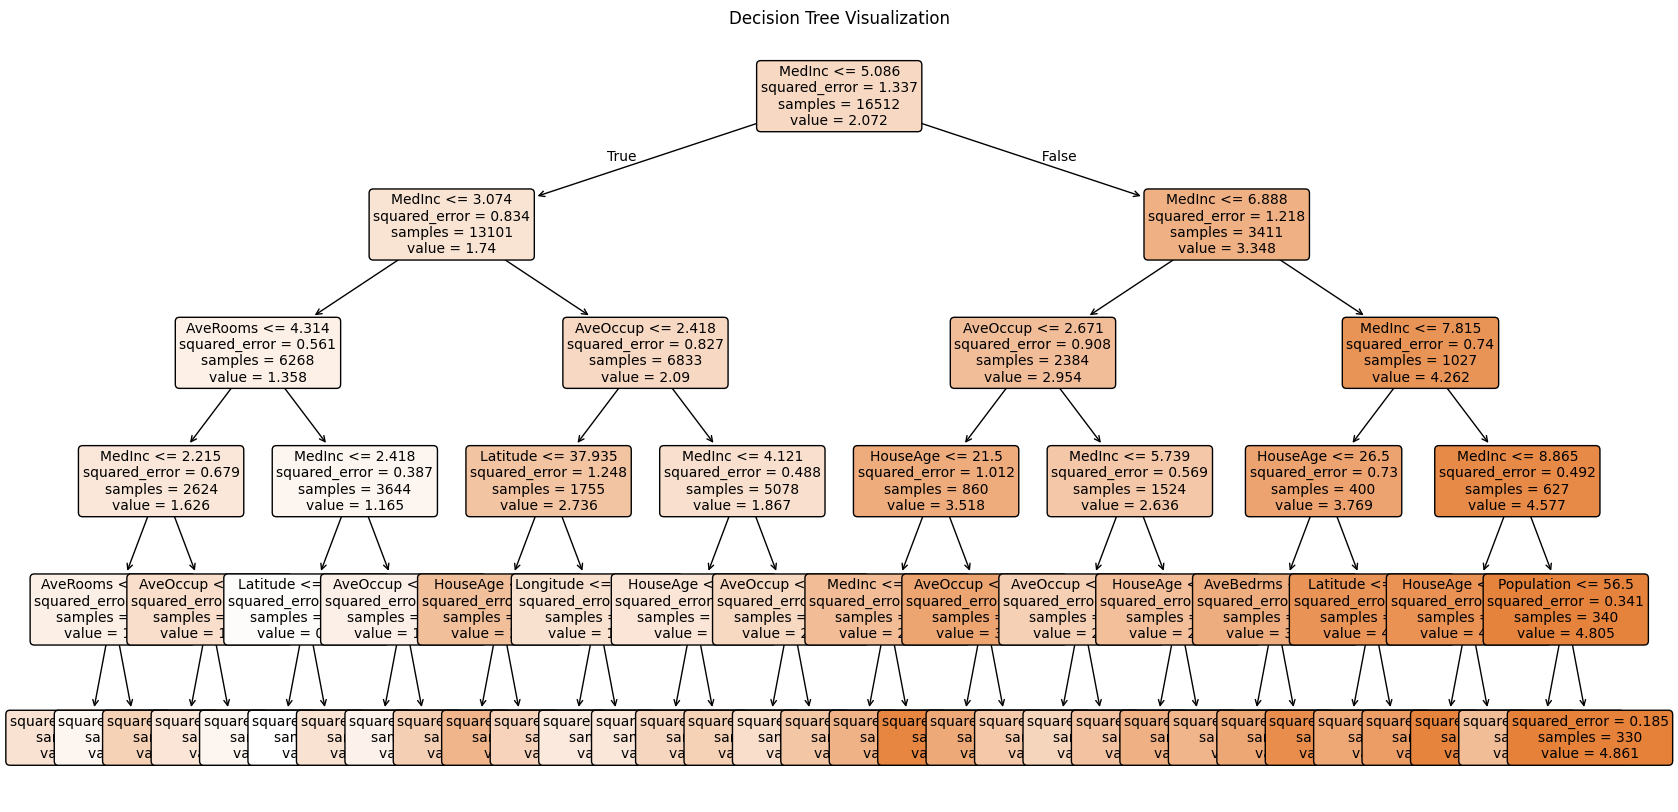

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. 加载数据集
data = fetch_california_housing(as_frame=True)
X = data.data  # 特征
y = data.target  # 目标值

# 2. 数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. 创建回归树模型
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)  # 设置树的最大深度为5
reg_tree.fit(X_train, y_train)

# 4. 模型预测
y_pred_train = reg_tree.predict(X_train)
y_pred_test = reg_tree.predict(X_test)

# 5. 评估模型
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"训练集均方误差 (MSE): {train_mse:.4f}")
print(f"测试集均方误差 (MSE): {test_mse:.4f}")

# 6. 决策树可视化
plt.figure(figsize=(20, 10))
plot_tree(
    reg_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

## 手动实现回归树代码

参数

In [2]:
max_depth = 5  # 树的最大深度
min_samples_split = 10  # 内部节点再划分所需最小样本数

### 构建树

树节点定义

In [3]:
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

计算均方误差

In [4]:
def calculate_mse(y):
    if len(y) == 0:
        return 0
    return np.mean((y - np.mean(y)) ** 2)

根据特征和阈值划分数据集

In [5]:
def split_dataset(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = X[:, feature] > threshold
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

找到最佳划分特征和阈值

In [6]:
def find_best_split(X, y):
    best_mse = float('inf')
    best_feature = None
    best_threshold = None
    for feature in range(X.shape[1]):  # 遍历所有特征
        thresholds = np.unique(X[:, feature])  # 特征的唯一值作为候选阈值
        for threshold in thresholds:
            X_left, X_right, y_left, y_right = split_dataset(
                X, y, feature, threshold)  # 根据特征和阈值划分数据集
            mse = (len(y_left) * calculate_mse(y_left) +
                   len(y_right) * calculate_mse(y_right)) / len(y)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature
                best_threshold = threshold
    return best_feature, best_threshold

构建树

In [7]:
def build_tree(X, y, max_depth, min_samples_split, depth=0):
    if depth == max_depth or len(y) < min_samples_split or len(np.unique(y)) == 1:
        # 达到最大深度，停止划分
        # 或者样本数量小于最小分裂样本数，停止划分
        # 或者所有样本的目标值相同，停止划分
        return TreeNode(value=np.mean(y))

    feature, threshold = find_best_split(X, y)
    if feature is None:  # 无法找到最佳分裂特征
        return TreeNode(value=np.mean(y))  # 返回叶节点

    X_left, X_right, y_left, y_right = split_dataset(X, y, feature, threshold)
    left_child = build_tree(X_left, y_left, max_depth,
                            min_samples_split, depth + 1)
    right_child = build_tree(X_right, y_right, max_depth,
                             min_samples_split, depth + 1)
    return TreeNode(feature=feature, threshold=threshold, left=left_child, right=right_child)

### 评测回归树模型

In [ ]:
def predict_tree(node, x):
    if node.value is not None:
        return node.value
    if x[node.feature] <= node.threshold:
        return predict_tree(node.left, x)
    return predict_tree(node.right, x)


def evaluate_tree(tree, X, y):
    y_pred = np.array([predict_tree(tree, x) for x in X])
    mse = mean_squared_error(y, y_pred)
    return mse


eval_tree = build_tree(X_train.values, y_train.values,
                       max_depth, min_samples_split)
train_mse = evaluate_tree(eval_tree, X_train.values, y_train.values)
test_mse = evaluate_tree(eval_tree, X_test.values, y_test.values)
print(f"训练集均方误差 (MSE): {train_mse:.4f}")
print(f"测试集均方误差 (MSE): {test_mse:.4f}")

训练集均方误差 (MSE): 0.4843
测试集均方误差 (MSE): 0.5245
